# INTRODUCCIÓN A LOS MODELOS MATEMÁTICOS EN GESTIÓN FINANCIERA: PROYECTO 1

#### Luisa Ortiz y Nicolas Robayo

#### Los paquetes a utilizar en este proyecto son los siguientes
1. Numpy es un paquete para el manejo de arrays matematicos con amplias capacidades para operadores matemáticos.
2. Matplotlib es una libreria de graficación estándar para gráficos sencillos
3. OS es una utilidad de python para recuperar los archivos con los datos de las acciones
4. Pandas es un paquete para la obtención y el manejo de grandes cantidades de información y acá se utiliza para organizar la información obtenida de la BVC.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from matplotlib.ticker import PercentFormatter
from os.path import isfile, join
import pandas as pd

In [79]:
#Para obtener las gráficas con un diseño adecuado utilizamos los siguientes parámetros 
#Parametros de las gráficas
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'legend.fancybox': True,
          'legend.fontsize': 12.0,
          'legend.frameon': False,
          'legend.shadow': True,
          'legend.title_fontsize': True}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

### 2. Escoja una familia de 6 a 9 activos para los cuales tenga información de sus precios en al menos 24 periodos iguales de tiempo como candidatos a conformar su portafolio. Explique la naturaleza de los activos escogidos a la luz de la lectura 1. Esto significa que usted debe escoger datos de Colombia esencialmente.

#### Familia de activos escogida
1. Ecopetrol
2. Grupo Argos
3. Preferencial Aval
4. Cementos Argos
5. Grupo Sura
6. Mineros
7. ISA
8. Corficolombiana
9. Preferencial Bancolombia
10. Preferencial Davivienda



Se obtuvieron los precios de cierre de 10 acciones que tranzan en la Bolsa de Valores de Colombia durante un periodo de 2 años para todas las acciones. 
$ T = ({t_1, t_2, t_3, ... t_{504}}) $
Se eligieron por su nivel de capitalización,  por su volumen de transacciones o para diversificar el portafolio a realizar. 

A la luz de la lectura 1 son acciones que tranzan diariamente en un mercado bursatil (La Bolsa de Valores de Colombia) que hace parte del sistema financiero.
 Este mercado de capitales es no intermediado lo que significa que la transferencia del ahorro a la inversión se realiza de forma directa. Para ello este mercado utiliza los títulos valores
 (las acciones en este caso) como el principal instrumento para la transferencia de los recursos del ahorro a la inversión con el objetivo de financiar las actividades 
 productivas del país. 

 El mercado de valores se constituye en una fuente de financiación económica para las empresas u otros emisores y una actractiva opcion de rentabilidad para los inversionistas. 
 La BVC está vigilada porla Superintendencia Financiera, entidad adscrita al Ministerio de Hacienda y tiene una regulación y reglamentos que velan por otorgar condiciones de seguridad, confiabilidad y acatamiento al  ordenamiento legal.

 Las acciones son un titulo valor que puede ser clasificado como de renta variable, es decir su valor esta ligado directamente al valor del activo. Ampara los derechos que posee el propietario respecto a su participación en una sociedad anónima.
 Se incluyeron acciones ordinarias y preferenciales. Las preferenciales tienen prioridad sobre los dividendos a ser distribuidos pero no tienen derecho a voto.  


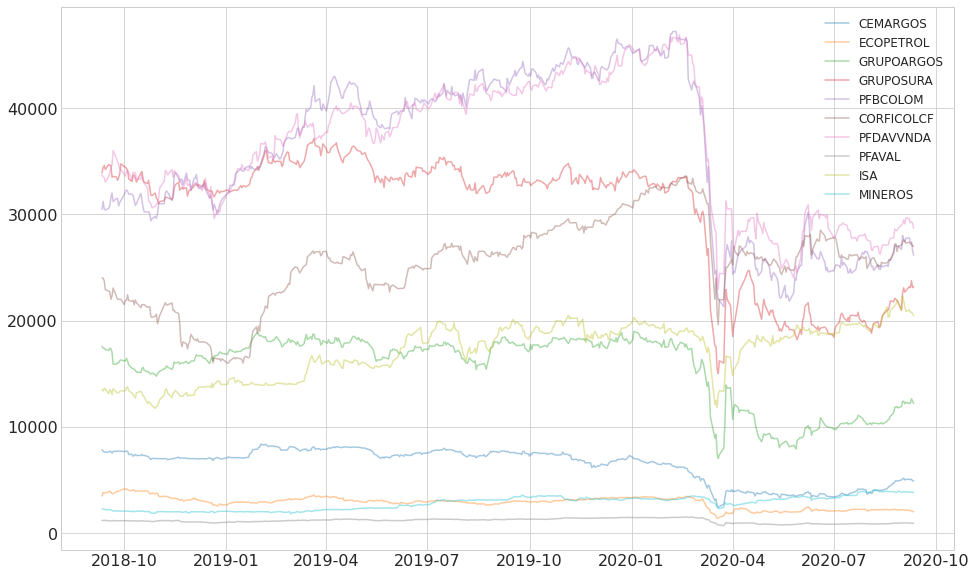

In [80]:
#Número de dias laborales en una semana
T = 5
#Obtenemos una matriz con los precios de las acciones en cada dia 
dir = "./Acciones/"
stocks = [dir +f for f in listdir(dir) if isfile(join(dir, f))]     
names =  [(pd.read_excel(f,   skiprows=1, usecols=[1], squeeze = True, nrows = 1).tolist()[0].strip()) for f in stocks]
fechas = (pd.read_excel(stocks[0],   skiprows=1, usecols=[2], squeeze = True)).to_numpy()
price = [(pd.read_excel(f,   skiprows=1, usecols=[5], squeeze = True)) for f in stocks]
prices = np.vstack(price) 
#Graficamos los precios de las acciones
for j, i in enumerate(prices):
    plt.plot(fechas,i ,        alpha=0.4      , label = names[j] )
plt.legend() 
plt.show()

Escogeremos un periodo de un año y medio desde el 11 de Septiembre de 2018 hasta el 19 de Febrero de 2020 debido a la crisis ocasionada por el virus Covid-19.
Esto equivale a 354 días, casi 71 semanas contando 5 días laborales en la semana

La temporalidad a usar será semanal (71 periodos). Para pasar los precios diarios a una temporalidad semanal el procedimiento efectuado fue el siguiente

1. Se calculo la matriz de varianzas con los precios diarios y el vector de retornos diarios
2. Se multiplico por 5 para pasarlos a una temporalidad semanal


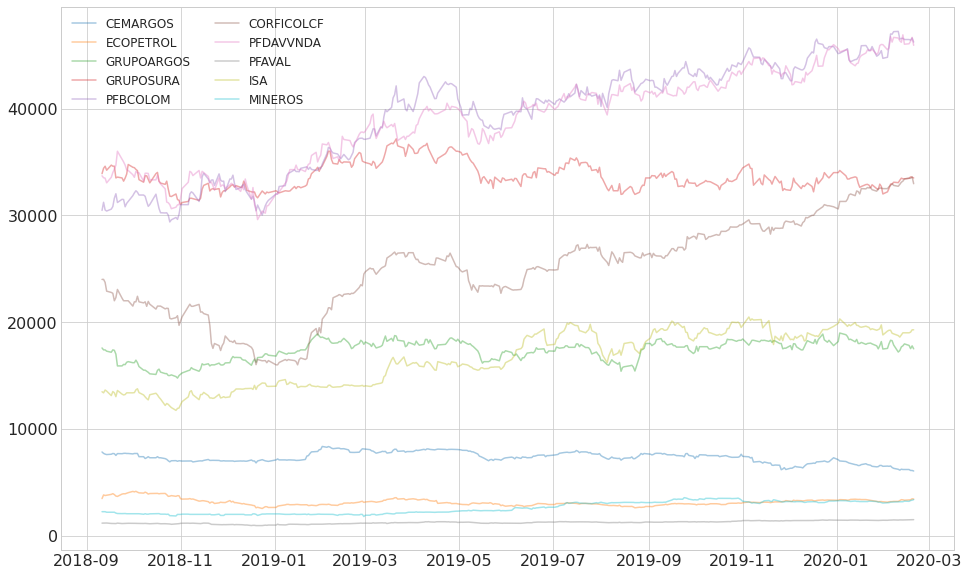

In [81]:
prices = np.delete(prices, slice(355,None), axis = 1)
fechas = np.delete(fechas, slice(355,None))
#Graficamos los precios de las acciones
for j, i in enumerate(prices):
    plt.plot(fechas,i ,        alpha=0.4      , label = names[j] )
plt.legend(ncol = 2) 
plt.show()

### 3. Utilizando las series de precios históricos de los activos escogidos, calcule paso a paso explicando las operaciones utilizadas: la matriz de covarianzas entre las rentabilidades de los activos escogidos y el vector de rendimientos promedio de los activos escogidos. Verifique que la matriz de covarianzas es una matriz semidefinida positiva (lo cual es un teorema) y verifique que es invertible, lo cual es deseable desde un punto de vista práctico.

En primer lugar se procede a hacer el cálculo de los retornos diarios por medio de los retornos normales con la función percReturns():
Se usan los retornos normales dado que vamos a analizar un set de inversiones en el mismo tiempo. Estos vienen de la aproximación de Taylor de primer grado de los retornos logarítmicos

$r_{kt}:\text{Retorno del activo } k \in K  \text{en el tiempo } t = 2, ..., 354$

$P_{kt}:\text{Precio del activo } k \in K  \text{en el tiempo } t =  1 {, .., }354$

$$
r_{k,t-1} = \frac{P_{kt} - P_{kt-1}}{P_{k,t-1}} \forall k \in K, t = 2, ..., 354
$$

Teniendo esto, se ajusta a la temporalidad manejada para estos datos, obteniendo el vector de retornos. 
En segundo lugar, se utiliza la función creada llamada variance() para hallar la matriz de covarianzas de los retornos diarios de los activos la cual se calcula con la fórmula ![title](Fotos/a-2.png) 
$$
\sigma_{kl} = \frac{1}{\mid T \mid} \sum_{t\in T}(r_{kt}-\overline{r_{k}})(r_{lt}-\overline{r_{l}})   \forall k\in K, l\in K | k\neq l  
$$
, teniendo en cuenta la temporalidad que se maneja. Cabe resaltar que en la función variance() se hace uso de la librería numpy y su función cov().

Posteriormente, se crea la función verificar_invertibilidad(), la cual evalúa (haciendo uso de la función np.linalg.det()) si el determinante de dicha función es mayor a 0, en cuyo caso la matriz no es singular y por lo tanto, es invertible. Esto se puede verificar satisfactoriamente mediante la ejecución del código.

La definición de esta matriz es la siguiente:
$$
x^t S x = \sum_{k=1}^{m} \sum_{l=1}^{m} x_kx_l\sigma_{kl}
$$

 En cuanto a si la matriz es semidefinida positiva, para que esto suceda se debe cumplir que todos sus componentes sean no negativos, dado que $ x^{t}Sx $ es igual al valor esperado del cuadrado de la sumatoria del producto entre $ x_i $ y $ r_i $, sabemos que dicho producto al cuadrado siempre será positivo, por lo que se puede afirmar que la matriz es en efecto semidefinida positiva. A continuación se muestra el fundamento matemático que soporta el resultado:

![title](Fotos/a-3.png)

La última linea siempre será mayor o igual a 0 debido al cuadrado de la suma. 

In [82]:
#Función que calcula los retornos logarítmicos
def logReturns(prices):
    return np.diff(np.log(prices))
#Función que calcula los retornos 
def percReturns(prices):
    return np.diff(prices) / prices[:,:-1]
#Función que calcula la varianza
def variance(logr):
    return np.cov(logr )
#Función que calcula las medias 
def means(logr):
    return np.mean(logr, axis = 1)
#Función que determina si la matriz es invertible basada en el valor del determinante. Si éste es mayor a cero, se concluye que la matriz no es singular, por lo que es invertible.
def verificar_invertibilidad(matriz):
    det = np.linalg.det(matriz)
    if det>0:
        print("La matriz es no Singular, por lo que es invertible.")
    else:
        raise Exception("La matriz es Singular por lo que no es invertible.")

Ahora realizaremos la transformación de los datos de diarios a semanal con los pasos explicados anteriormente. 

In [83]:
#Cálculo de parámetros con funciones definidas
n = np.shape(prices)[0]
retornos_diarios = percReturns(prices)
returns = retornos_diarios.mean(axis = 1)*T
cov_diaria = (variance(retornos_diarios))
cov= cov_diaria *T

#Se verifica invertibilidad
verificar_invertibilidad(cov)

#Se invierte la matriz
inv_cov = np.linalg.inv(cov)

#Configuración general
np.set_printoptions(precision=6, linewidth=150)
#print(names)
print("A continuación se muestra la Matriz de Covarianza")

#Se crea data frame con la matriz de varianzas y se muestra
dfVarcov=pd.DataFrame(cov, index=names, columns=names)

display(dfVarcov)

print("Los retornos esperados semanales de cada acción son:")
display(pd.DataFrame(returns, index = names, columns = ("Retorno Semanal",)).style.format({'Retorno Semanal': '{0:.4%}'}))





La matriz es no Singular, por lo que es invertible.
A continuación se muestra la Matriz de Covarianza


,CEMARGOS,ECOPETROL,GRUPOARGOS,GRUPOSURA,PFBCOLOM,CORFICOLCF,PFDAVVNDA,PFAVAL,ISA,MINEROS
CEMARGOS,0.000895,0.000129,0.000341,0.000298,0.000224,0.000230,0.000188,0.000119,0.000208,0.000032
ECOPETROL,0.000129,0.001734,0.000282,0.000283,0.000468,0.000068,0.000172,0.000271,0.000196,0.000127
GRUPOARGOS,0.000341,0.000282,0.001182,0.000318,0.000334,0.000136,0.000084,0.000269,0.000326,0.000181
GRUPOSURA,0.000298,0.000283,0.000318,0.000659,0.000319,0.000213,0.000201,0.000249,0.000310,0.000194
PFBCOLOM,0.000224,0.000468,0.000334,0.000319,0.000919,0.000120,0.000306,0.000305,0.000268,0.000145
CORFICOLCF,0.000230,0.000068,0.000136,0.000213,0.000120,0.001358,0.000309,0.000340,0.000337,0.000082
PFDAVVNDA,0.000188,0.000172,0.000084,0.000201,0.000306,0.000309,0.000917,0.000234,0.000240,0.000198
PFAVAL,0.000119,0.000271,0.000269,0.000249,0.000305,0.000340,0.000234,0.001092,0.000372,0.000092
ISA,0.000208,0.000196,0.000326,0.000310,0.000268,0.000337,0.000240,0.000372,0.001583,0.000297
MINEROS,0.000032,0.000127,0.000181,0.000194,0.000145,0.000082,0.000198,0.000092,0.000297,0.001659


Los retornos esperados semanales de cada acción son:


,Retorno Semanal
CEMARGOS,-0.3189%
ECOPETROL,0.0682%
GRUPOARGOS,0.0524%
GRUPOSURA,0.0162%
PFBCOLOM,0.6350%
CORFICOLCF,0.5160%
PFDAVVNDA,0.4829%
PFAVAL,0.3980%
ISA,0.5846%
MINEROS,0.6578%


### 4. Con base en la matriz de covarianzas y el vector de rendimientos promedio, calcule los parámetros de la teoría de la cartera a los que hemos llamado A, B y C exponiendo en su trabajo las fórmulas de las formas cuadráticas que se requieren: 
$A = \widehat{u}^{t} S^{-1}\widehat{u}$

$B =   \widehat{u}^{t} S^{-1} \overline{r}$

$C = \overline{r}^{t} S^{-1} \overline{r}$ 

In [84]:
#Se crea el vector de unos
ones = np.ones(n, dtype = np.int8)

#Se calculan los parámetros A, B, C y D con las fórmulas presentadas
A = ones.T@inv_cov@ones  #@ is Matrix multiplication
B = ones.T@inv_cov@returns
C= returns.T@inv_cov@returns
D = A*C-B**2

print("Utilizando las fórmulas se encuentren los siguientes resultados:")
print("El valor de A es: ",A)
print("El valor de B es: ",B)
print("El valor de C es: ",C)
print("El valor de D es: ",D)

Utilizando las fórmulas se encuentren los siguientes resultados:
El valor de A es:  3205.1432954304028
El valor de B es:  7.972288518762176
El valor de C es:  0.13494017134723235
El valor de D es:  368.9452012514243


### Punto 5. 

Utilizando A, B y C y un nivel de rentabilidad 𝜇 usado como parámetro escriba la ecuación general de los portafolios óptimos que usted puede formar 
con los activos escogidos a través del criterio de mínima varianza propio de la teoría de la cartera de Markowitz:
$$ 
 x^*(\mu)=(\frac{C-B\mu}{D}) S^{-1}\widehat{u}+(\frac{A\mu -B}{D})S^{-1}\overline{r}   
$$   
      
 Escriba esta ecuación para su caso tomando 4 valores diferentes para el parámetro $\mu$. Comente si obtiene o no posiciones en corto.

Teniendo en cuenta la formulación del problema de optimización: 


$$
\text{Minimizar  }\sigma^2 = x^{t}Sx  
$$

$$
\text{s.a.} 
$$

$$
\widehat{u}^{t}x=1 
$$

$$
\overline{r}^{t}x=\mu
$$
  

##### La ecuación dado los valores de A,B,C, D es igual a 
$$
x^*(\mu)=(\frac{0.1349-7.9722\mu}{368.9452}) S^{-1}\widehat{u}+(\frac{3205.143295\mu -7.9452}{368.9452})S^{-1}\overline{r}   
$$

Escogemos los valores de $\mu:$
$\mu_1 = 0.4\%, \mu_2 = 0.7\%, \mu_3 = 0.9\%, \mu_4 = 1.1\% $ 
para encontrar cuatro portafolios sobre la curva eficiente

In [85]:
#Se fijan los valores de miu
valores_miu = (0.004, 0.007, 0.009, 0.011)

#Cálculo de pesos óptimos para cada valor de miu
portafolios = []
for miu in valores_miu:
    portafolios.append((C-B*miu)/D*inv_cov@ones + (A*miu-B)/D*inv_cov@returns)
portafolios = np.vstack(portafolios)
#print(names, portafolios, sep="\n")

print("Los pesos de cada portafolio son los siguientes: ")

#Se crea un data frame con los resultados
dfPort=pd.DataFrame(portafolios, index=["Portafolio Miu " + str(i) for i in valores_miu], columns=names)
display(dfPort)


Los pesos de cada portafolio son los siguientes: 


,CEMARGOS,ECOPETROL,GRUPOARGOS,GRUPOSURA,PFBCOLOM,CORFICOLCF,PFDAVVNDA,PFAVAL,ISA,MINEROS
Portafolio Miu 0.004,0.074897,0.040874,0.058153,0.069678,0.167392,0.124570,0.160086,0.104981,0.053223,0.146146
Portafolio Miu 0.007,-0.114097,-0.014496,0.029901,-0.070722,0.364551,0.192660,0.193036,0.106481,0.109607,0.203078
Portafolio Miu 0.009,-0.240092,-0.051410,0.011067,-0.164322,0.495990,0.238053,0.215003,0.107481,0.147197,0.241033
Portafolio Miu 0.011,-0.366087,-0.088323,-0.007767,-0.257922,0.627429,0.283446,0.236970,0.108481,0.184786,0.278987


Se obtuvieron posiciones en corto en tres de los cuatro portafolios creados. El único portafolio sin posiciones en corto es el que tiene $ \mu = 0.4\% $

Los otros tres portafolios tienen posiciones en corto dado que no hay activos con rentabilidades iguales o mayores a los $ \mu $ requeridos.

### 6. En un plano riesgo retorno dibuje la gráfica de la frontera eficiente del conjunto de activos que usted escogió para invertir en el punto 2. Sobre la misma gráfica dibuje la posición de cada uno de los activos que usted escogió para invertir en el punto 2 y la posición de cada uno de los 4 portafolios óptimos que usted escogió en el punto 5. Utilice la varianza como medida de riesgo en el eje de riesgo.


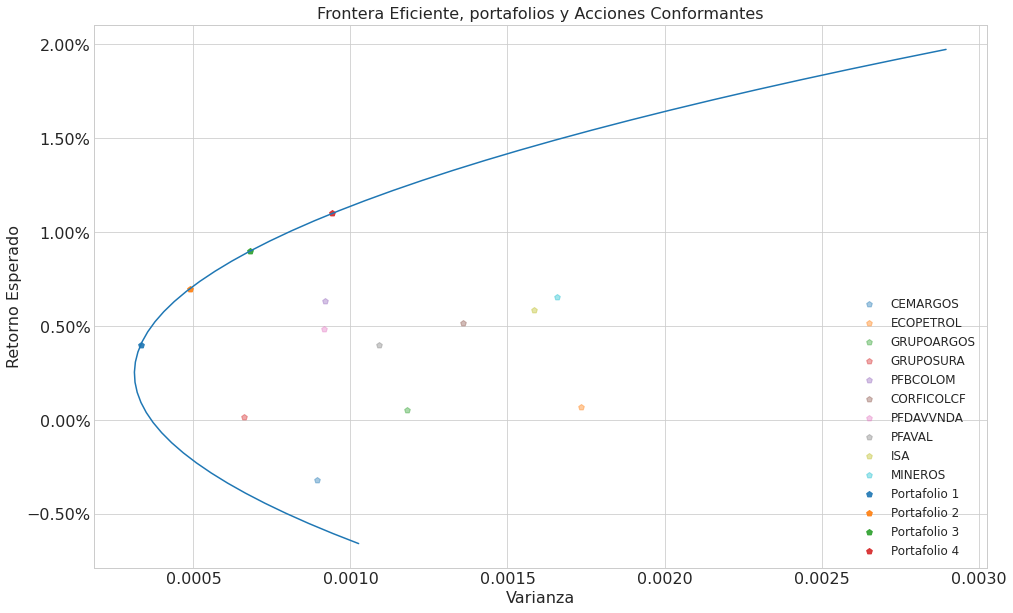

In [86]:
#Se defina la expresión a evaluar
formula = '(A*x**2-2*x*B+C)/D'
#Se definen los valores para x y y
x = np.linspace(-1*returns.max(),3*returns.max())
y = eval(formula)
T= np.shape(prices)[1]    

#Graficar la frontera eficiente y los puntos que representan los activos y los portafolios
for i, name in enumerate(names):        
    plt.scatter(np.diag(cov)[i] ,returns[i]  ,    cmap="BuPu",     alpha=0.4,       marker='p' , label = name  )
for j,i in enumerate(portafolios):
    ret = i@returns
    var = i.T@cov@i
    plt.scatter(var ,ret  ,    cmap="winter",     alpha=0.9,       marker='p' , label = "Portafolio " +str(j+1)  )
plt.legend()    

plt.plot(y,x)  
plt.ylabel('Retorno Esperado')
plt.xlabel('Varianza')
plt.title('Frontera Eficiente, portafolios y Acciones Conformantes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
    

### 7. Repita la gráfica 6 pero ahora utilice la desviación estándar como medida de riesgo en el eje de riesgo. Plasme en esta gráfica cada uno de los 4 portafolios óptimos escogidos en el punto 5 y para cada uno de ellos trace la línea de mercado de capital, ya que cada uno de ellos es un portafolio eficiente y por lo tanto un portafolio de mercado. Para cada línea de mercado de capital encuentre el corte con el eje de rentabilidad que corresponde a la tasa libre de riesgo compatible con cada uno de los portafolios de mercado así escogidos. Haga varias gráficas para no recargar la figura con muchos datos.

Para el cálculo de esta gráfica se deben tener en cuenta que se quiere maximizar la pendiente formada entre el portafolio y un activo libre de riesgo, lo que es equivalente a tener el problema:![title](Fotos/a-4.png)
Donde $\tau$ corresponde a la tasa libre de riesgo. Se puede ver que implícitamente esta función objetivo también contempla la minimización del riesgo, cuya expresión está representada en el denominador de la fracción.

Del problema de optimización se obtiene la siguiente fórmula para el cálculo de la tasa libre de riesgo apropiada para cada portafolio:

![title](Fotos/a-5.png)

Por otro lado, se obtienen las expresiones para el retorno y varianza del portafolio de mercado, las cuales se muestran a continuación:

![title](Fotos/a-6.png)


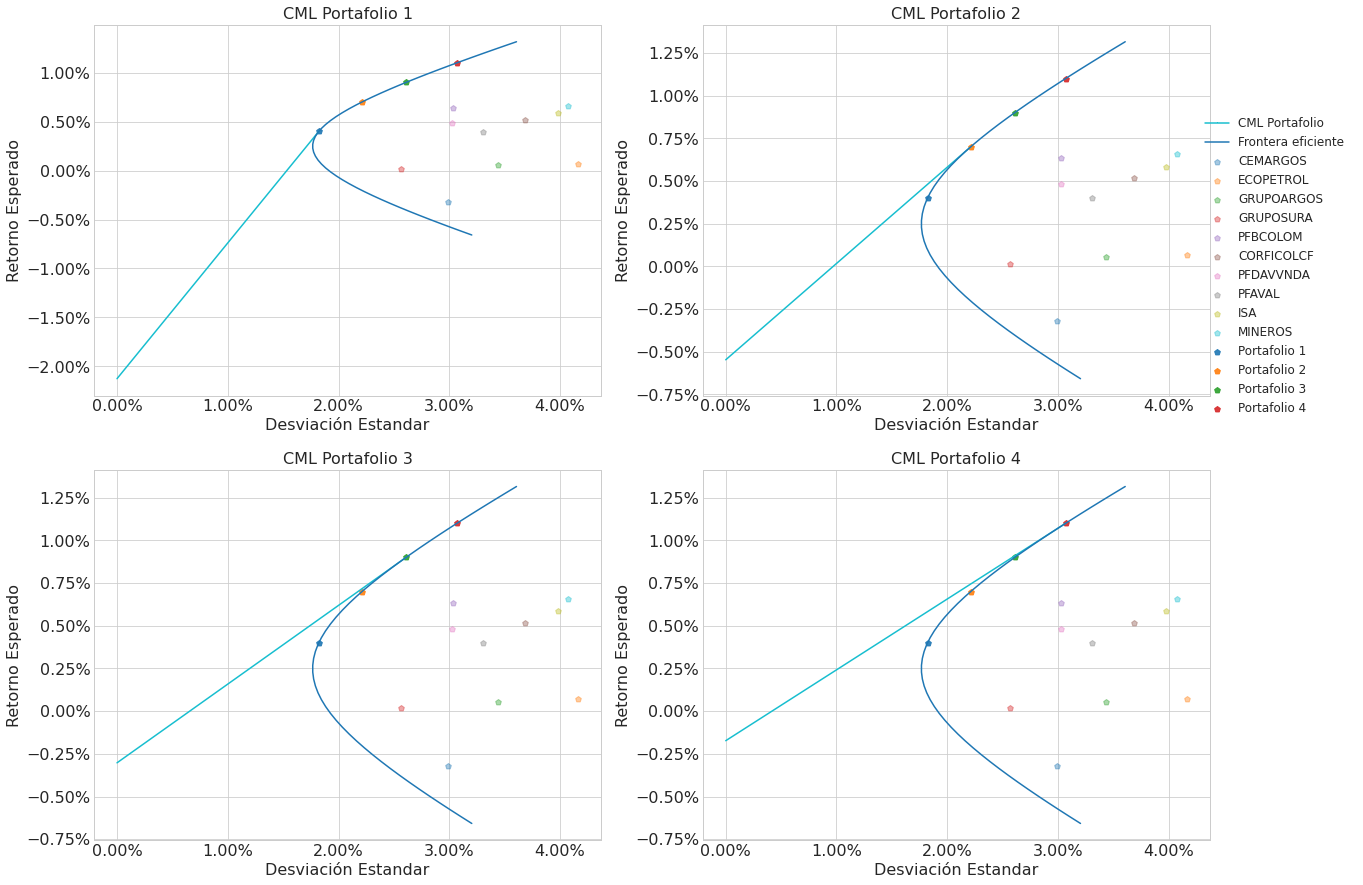

La tasa libre de riesgo para el portafolio  CEMARGOS  es  -2.1255%
La tasa libre de riesgo para el portafolio  ECOPETROL  es  -0.5471%
La tasa libre de riesgo para el portafolio  GRUPOARGOS  es  -0.3027%
La tasa libre de riesgo para el portafolio  GRUPOSURA  es  -0.1732%


In [87]:
formula = '   np.sqrt((A*x**2-2*x*B+C)/D )          '
x = np.linspace(-1*returns.max(),2*returns.max())
tau_portafolios = []
#Hago una gráfica por cada portafolio de mercado
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
for k, ax in enumerate(axs.reshape(-1)): 
    l = portafolios[k]
    #Se definen los valores de tau
    tau_portafolios.append((l@returns*B-C)/(l@returns*A-B) )#La varianza es 0
    ax.plot((0,np.sqrt(l.T@cov@l)),(tau_portafolios[k],l@returns), ',-', label = "CML Portafolio", color ="C9")

    
    y = eval(formula)
    ax.plot(y,x, label = "Frontera eficiente")
    T= np.shape(prices)[1]    
    for i, name in enumerate(names):        
        ax.scatter(np.diag(cov)[i] **(1/2) ,returns[i]  ,    cmap="BuPu",     alpha=0.4,       marker='p' , label = name  )
    for j,i in enumerate(portafolios):
        ax.scatter(    np.sqrt(i.T@cov@i )    ,i@returns  ,    cmap="winter",     alpha=0.9,       marker='p' , label = "Portafolio " +str(j+1)  )    
    
    ax.set_xlabel('Desviación Estandar')
    ax.set_ylabel('Retorno Esperado')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))
    ax.set_title('CML Portafolio '+str(k+1))
    
plt.legend( bbox_to_anchor=(1.3,2), fancybox=True, framealpha=1, shadow=True, borderpad=1)   

plt.show()

for i in range(0,4):
    print("La tasa libre de riesgo para el portafolio ", names[i], " es ", "{0:.4%}".format(tau_portafolios[i]))
    

### 8. Dibuje nuevamente la frontera eficiente dada en términos de la desviación estándar, como se indica en la pregunta 7, pero ahora dibuje sobre ella la línea que corresponde a su asíntota superior. Indique claramente el corte de ella (la asíntota) con el eje de rendimiento, su valor y su interpretación como una tasa libre de riesgo máxima teórica.

La pendiente de la asíntota superior se da por el límite de la pendiente de la frontera eficiente cuando $\mu$ tiende a infinito:

![title](Fotos/a-7.png)

El corte con el eje de retorno se obtiene al calcular el límite de $\tau$ cuando $\mu$ tiende al infinito:

![title](Fotos/a-8.png)

Es interesante notar que este valor de retorno coincide también con el componente de la coordenada del vértice de la frontera eficiente. 

Después de obtener tanto el corte de la recta, como su pendiente, se obtiene que la ecuación de la asíntota superior en función de $\sigma$ es:

![title](Fotos/a-9.png)

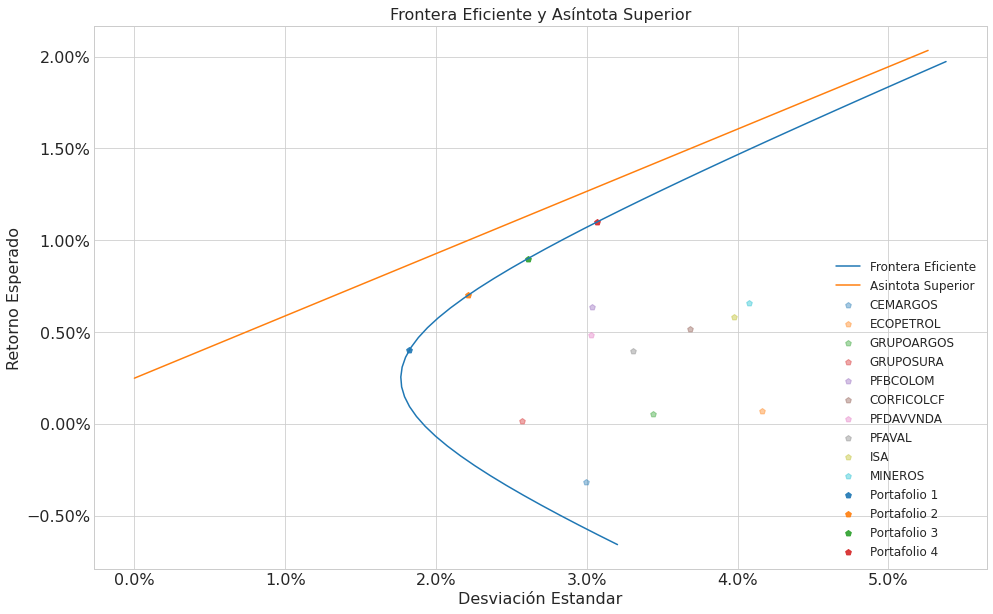

In [88]:
#Se define la fórmula
formula = '   np.sqrt((A*x**2-2*x*B+C)/D )          '
x = np.linspace(-1*returns.max(),3*returns.max())

#Se crea la frontera eficiente y se grafican los puntos de portafolio y activos
for i, name in enumerate(names):        
    plt.scatter(np.diag(cov)[i] **(1/2) ,returns[i]  ,    cmap="BuPu",     alpha=0.4,       marker='p' , label = name  )

for j,i in enumerate(portafolios):
        ret = i@returns
        var = i.T@cov@i
        desv = np.sqrt(var)
        plt.scatter(desv ,ret  ,    cmap="winter",     alpha=0.9,       marker='p' , label = "Portafolio " +str(j+1)  )


y = eval(formula)

#Se genera la asíntota superior y se grafica
plt.plot(y,x, label = "Frontera Eficiente") 
x = np.linspace(0,8*returns.max())
y = eval("(B/A)+ ((D/A)**(1/2))*x")
plt.plot(x,y, label = "Asintota Superior")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Retorno Esperado')
plt.xlabel('Desviación Estandar')
plt.title('Frontera Eficiente y Asíntota Superior')
plt.legend()  
plt.show()


### Punto 9. Justificando y escribiendo paso a paso las fórmulas empleadas, encuentre el portafolio de menor riesgo que puede componer entre los activos que usted seleccionó en el punto 2. Exponga la composición del portafolio, la rentabilidad obtenida y el nivel de riesgo tanto en varianza como en desviación estándar.

En primer lugar, se halla el $\mu$ óptimo derivando la expresión del riesgo en función de $\mu$, como se muestra a continuación:

![title](Fotos/a-10.png)

Posteriormente, se calcula el $\sigma^2$ óptimo al utilizar el $\mu^{*}$ hallado anteriormente:

![title](Fotos/a-11.png)

Finalmente, se calculan los pesos de cada activo con las coordenadas halladas, obteniendo así:

![title](Fotos/a-12.png)

Los resultados se muestran a continuación:

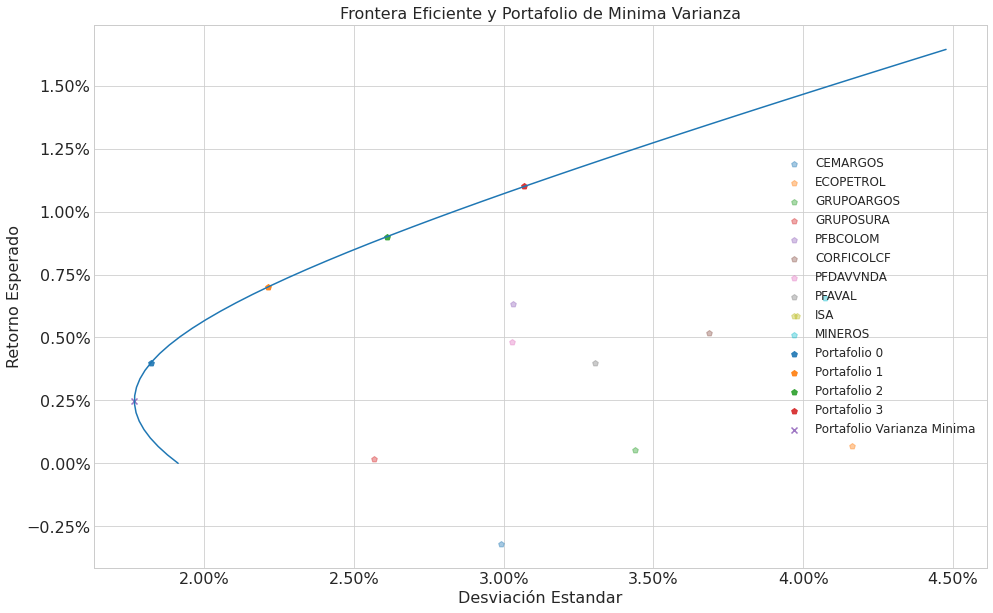

Para hallar el retorno del portafolio óptimo, se utiliza la fórmula B/A y se obtiene un valor de:  0.0024873423070127096
 
Para hallar el riesgo (varianza) del portafolio óptimo, se utiliza la fórmula 1/A y se obtiene un valor de:  0.00031199853105653893
 
Los pesos se muestran en la tabla a continuación: 
 


,Pesos
CEMARGOS,17.0191%
ECOPETROL,6.8793%
GRUPOARGOS,7.2398%
GRUPOSURA,14.0470%
PFBCOLOM,6.7981%
CORFICOLCF,9.0238%
PFDAVVNDA,14.3472%
PFAVAL,10.4225%
ISA,2.4793%
MINEROS,11.7440%


Se puede ver que se no se toman posiciones en corto


In [89]:

formula = '   np.sqrt((A*x**2-2*x*B+C)/D )          '
x = np.linspace(0,2.5*returns.max())
y = eval(formula)
T= np.shape(prices)[1]    

#Se grafica la frontera eficiente, los puntos de portafolio y activos. 
for i, name in enumerate(names):        
    plt.scatter((np.diag(cov)[i])**(1/2) ,returns[i]  ,    cmap="BuPu",     alpha=0.4,               marker='p' , label = name  )
for j,i in enumerate(portafolios):
    plt.scatter(np.sqrt(i.T@cov@i) ,i@returns  ,    cmap="winter",     alpha=0.9,       marker='p' , label = "Portafolio " +str(j)  )

#Se grafíca el portafolio óptimo
plt.scatter((1/A)**(1/2) ,B/A  ,    cmap="winter",     alpha=0.9,       marker='x' , label = "Portafolio Varianza Minima" )
plt.legend()    
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Retorno Esperado')
plt.title('Frontera Eficiente y Portafolio de Minima Varianza')
plt.xlabel('Desviación Estandar')
plt.plot(y,x)  
plt.show()

print("Para hallar el retorno del portafolio óptimo, se utiliza la fórmula B/A y se obtiene un valor de: ",B/A)
print(" ")
#print("x_min" , (inv_cov@ones)/A)
print("Para hallar el riesgo (varianza) del portafolio óptimo, se utiliza la fórmula 1/A y se obtiene un valor de: ", 1/A)
print(" ")
print("Los pesos se muestran en la tabla a continuación: ")
print(" ")

#Se crea el data frame con los pesos
dfXmin=pd.DataFrame((inv_cov@ones)/A, index=names, columns=["Pesos"])
display(dfXmin.style.format({'Pesos': '{0:.4%}'}))
print("Se puede ver que se no se toman posiciones en corto")

### 10. Para cada uno de los 4 portafolios óptimos escogidos en el punto 5 haga una tabla que contenga su rentabilidad promedio, su varianza, su desviación estándar, la tasa libre de riesgo compatible con cada uno de ellos. Encuentre las funciones que le permiten hallar (𝜎 (𝜇), 𝑟̅ (𝜇)) en términos del parámetro de rentabilidad y 𝑃𝑀 𝑃𝑀 verifique que los valores de la tabla cumplen la fórmula. Encuentre las funciones que le permiten hallar (𝜎 (𝜏), 𝑟̅ (𝜏)) en términos de la tasa libre de riesgo y verifique que los valores de la tabla cumplen la fórmula. 𝑃𝑀 𝑃𝑀 Grafique la curva con ambas fórmulas la cual debería ser (gráficamente) la misma e interpolar los puntos de su tabla. Encuentre la fórmula que permite calcular la tasa libre de riesgo a partir de las coordenadas del portafolio de mercado (𝜎 , 𝑟̅ ) la cual implica a los parámetros A, B y C ya calculados. Verifique que los datos de su tabla 𝑃𝑀 𝑃𝑀 cumplen con esta fórmula. 



In [90]:
#Valores de los portafolios
portafolios10=list()
rentabilidades=list()
varianzasp=list()
desvest=list()
for j,i in enumerate(portafolios):
    portafolios10.append("Portafolio "+str( j+1))
    rentabilidades.append( i@returns     )
    varianzasp.append( i@cov@i.T)
    desvest.append(np.sqrt(i@cov@i.T)  )

#Se crea el data frame con la información de la tabla
dfValPort=pd.DataFrame(index=portafolios10)
dfValPort['Rentabilidad Promedio']=rentabilidades
dfValPort['Varianza']=varianzasp
dfValPort['Desviación Estándar']= desvest

display(dfValPort.style.format({'Rentabilidad Promedio': '{0:.4%}', 'Desviación Estándar':'{0:.4%}'}))

,Rentabilidad Promedio,Varianza,Desviación Estándar
Portafolio 1,0.4000%,0.000332,1.8217%
Portafolio 2,0.7000%,0.000489,2.2111%
Portafolio 3,0.9000%,0.000680,2.6086%
Portafolio 4,1.1000%,0.000942,3.0684%


Para hallar los parámetros $\sigma$ y $\overline{r}$ en términos de $\mu$ se utilizan las siguientes demostraciones:

![title](Fotos/a-13.png)

![title](Fotos/a-14.png)

Empleando las fórmulas resultantes se obtienen los siguientes resultados:


In [91]:
#Valores calculados con la formula sigmaPM((miu))
mius101=list()
var_mercado101=list()
sigma101=list()
portafolios101=list()
for j,i in enumerate(portafolios):
    portafolios101.append("Portafolio "+ str(j+1))
    miu=i@returns
    mius101.append(miu )
    var_mercado=((A*miu**2)-2*B*miu+C)  /D
    var_mercado101.append(var_mercado)
    sigma101.append( (var_mercado)**(1/2))
    
#Se muestran los datos en un data frame
df101=pd.DataFrame(index=portafolios101)
df101['Valor Esperado del Retorno']=mius101
df101['Varianza']=var_mercado101
df101['Desviación Estándar']=sigma101
display(df101.style.format({'Valor Esperado del Retorno': '{0:.4%}', 'Desviación Estándar':'{0:.4%}'}))

,Valor Esperado del Retorno,Varianza,Desviación Estándar
Portafolio 1,0.4000%,0.000332,1.8217%
Portafolio 2,0.7000%,0.000489,2.2111%
Portafolio 3,0.9000%,0.000680,2.6086%
Portafolio 4,1.1000%,0.000942,3.0684%


Se calculan $σ(τ)_{PM}^{2*}$ y $\overline{r}_{PM}^{*}$(τ) como:


![title](Fotos/a-15.png)


Dadas estas fórmulas se presentan los siguientes resultados:


In [92]:
#Valores calculados con la formula sigmaPM((TAU))
mius102=list()
var_mercado102=list()
sigma102=list()
portafolios102=list()

for j,i in enumerate(portafolios):
    portafolios102.append("Portafolio " + str(j+1))
    miu=( i@returns)
    tau = (miu*B-C)/(miu*A-B) #La varianza es 0
    mius102.append( (C-tau*B)/(B-tau*A))
    var_mercado = (C-2*B*tau + A*tau**2)/((B-tau*A)**2)
    var_mercado102.append(var_mercado)
    sigma102.append( (var_mercado)**(1/2))
 
#Se muestran los datos en un data frame
df102=pd.DataFrame(index=portafolios102)
df102['Valor Esperado del Retorno']=mius102
df102['Varianza']=var_mercado102
df102['Desviación Estándar']=sigma102
display(df102.style.format({'Valor Esperado del Retorno': '{0:.4%}', 'Desviación Estándar':'{0:.4%}'}) )

,Valor Esperado del Retorno,Varianza,Desviación Estándar
Portafolio 1,0.4000%,0.000332,1.8217%
Portafolio 2,0.7000%,0.000489,2.2111%
Portafolio 3,0.9000%,0.000680,2.6086%
Portafolio 4,1.1000%,0.000942,3.0684%


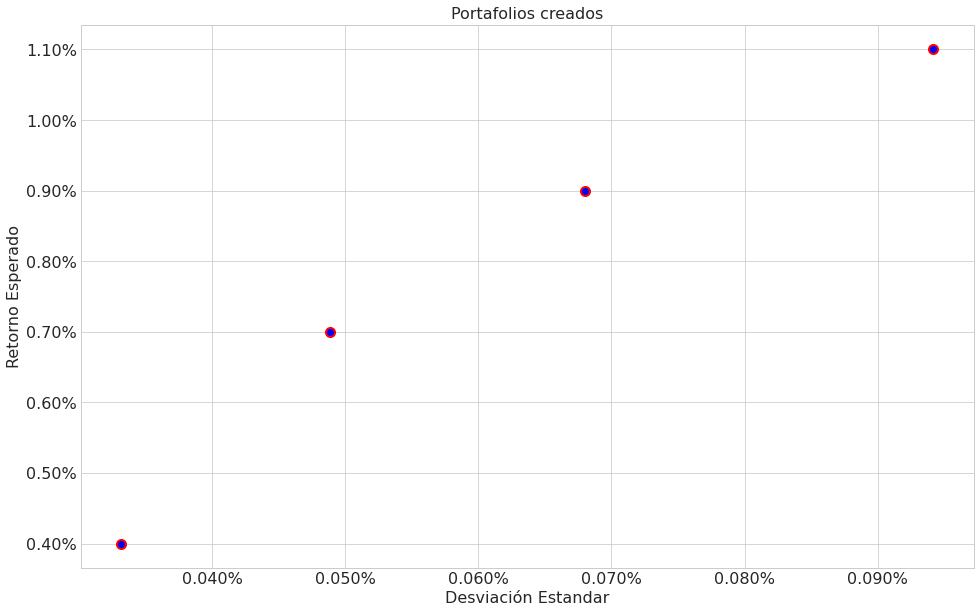

In [93]:
#graficar puntos

plt.scatter(df101["Varianza"], df101["Valor Esperado del Retorno"]  ,color='red' ,s = 100)
plt.scatter(df102["Varianza"], df101["Valor Esperado del Retorno"] ,color='blue')
#Formatear gráfica
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Retorno Esperado')
plt.title('Portafolios creados')
 
plt.xlabel('Desviación Estandar')

plt.show()


Se puede comprobar que efectivamente se obtiene que las gráficas se interpolan

Teniendo en cuenta los cálculos realizados, se obtiene la expresión para el cálculo de $\tau$ como:

![title](Fotos/a-16.png)

### 11. Escoja uno solo entre los portafolios óptimos posibles y encuentre su tasa libre de riesgo apropiada, para cada uno de los activos que usted escogió en el punto 2 calcule el índice beta siguiendo las dos fórmulas teóricas para ello:
1. $\frac{ cov(r_{x},r_{PM})    }{var(r_{PM})}$
2. $\frac{( {\overline{r}}_{x} -  \tau  )}{ ({\overline{r}}_{PM} - \tau)}$

![Title](Fotos/Foto1.png)


Para encontrar la tasa libre de riesgo apropiada para este portafolio, se hace uso de la fórmula: $\tau = \frac{\mu B-C}{\mu A-B}$ . En cuanto a los índices beta, se hace uso de las fórmulas dadas en el enunciado. Con respecto a estos índices, se debe prestar especial atención a que efectivamente mediante las dos definiciones ofrecidas, se obtiene el mismo valor y es de gran utilidad saberlos, pues representa al grado de variabilidad en la rentabilidad que tiene cada activo con respecto al mercado, representado por el portafolio de mercado o por la tasa libre de riesgo ($\tau$).

In [94]:
i = portafolios[2]
#Se hallan los valores de miu, tau y varianza 
miu = i@returns
tau = (miu*B-C)/(miu*A-B)
var_port_mercado = i.T@cov@i
covs=list()
betas_COV=list()
betas_TAU=list()
#Se hallan los valores de beta por medio de los dos enfoques
for j in range(len(returns)):
    e_vector = np.zeros(len(returns), dtype= np.int8)
    e_vector[j]=1
    covar_activo = i.T@cov@e_vector
    covs.append(covar_activo)
    beta_COV = covar_activo/var_port_mercado
    betas_COV.append(beta_COV)
    beta_TAU = (e_vector@returns-tau)/(miu-tau)
    betas_TAU.append(beta_TAU)

#Se imprime como dataframe
dfBetas=pd.DataFrame(index=names)
dfBetas['Valor Esperado del Retorno']=returns
dfBetas['Desviación Estándar']=covs
dfBetas['Beta Cov.']=betas_COV
dfBetas['Beta Tau']=betas_TAU

display(dfBetas.style.format({'Valor Esperado del Retorno': '{0:.4%}', 'Desviación Estándar':'{0:.4%}'})      )

,Valor Esperado del Retorno,Desviación Estándar,Beta Cov.,Beta Tau
CEMARGOS,-0.3189%,-0.0009%,-0.013455,-0.013455
ECOPETROL,0.0682%,0.0210%,0.308401,0.308401
GRUPOARGOS,0.0524%,0.0201%,0.295265,0.295265
GRUPOSURA,0.0162%,0.0180%,0.265141,0.265141
PFBCOLOM,0.6350%,0.0531%,0.779676,0.779676
CORFICOLCF,0.5160%,0.0463%,0.680728,0.680728
PFDAVVNDA,0.4829%,0.0444%,0.653225,0.653225
PFAVAL,0.3980%,0.0396%,0.582616,0.582616
ISA,0.5846%,0.0502%,0.737761,0.737761
MINEROS,0.6578%,0.0543%,0.798656,0.798656
